In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from jupyterthemes import jtplot
import math
jtplot.style()

# Exercises

### 3.1 

$ \vec{x} = [x_1, x_2]^T$

$ \vec{y} = [y_1, y_2]^T$

Show that 

$\langle \vec{x}, \vec{y} \rangle := x_1y_1 - (x_1y_2 + x_2y_1) + 2(x_2y_2) $ is an inner product.

[Prove that a function is an inner product](https://math.stackexchange.com/questions/217486/prove-that-a-function-is-an-inner-product)


If you ever want to show something is an inner product, you need to show three things:

1. Symmetry:  ⟨𝑓,𝑔⟩=⟨𝑔,𝑓⟩ (Or, if the field is the complex numbers, ⟨𝑓,𝑔⟩=⟨𝑔,𝑓⟩, i.e. "conjugate symmetry.)

2. Linearity: ⟨𝛼𝑓,𝑔⟩=𝛼⟨𝑓,𝑔⟩. Notice this also implies ⟨𝑓,𝛼𝑔⟩=𝛼⟨𝑓,𝑔⟩ (𝛼 in the complex case) by symmetry.

3. Positive-definite: ⟨𝑓,𝑓⟩≥0 with equality if and only if 𝑓=0, the zero function.

How to solve
1. show ⟨x,y⟩=⟨y,x⟩  
$⟨x,y⟩= 𝑥_1𝑦_1−(𝑥_1𝑦_2+𝑥_2𝑦_1)+2(𝑥_2𝑦_2)   $  
$ = y_1x_1−(y_1x_2+y_2x_1)+2(y_2x_2)  $
= ⟨y,x⟩


2. show ⟨Cx,y⟩= C⟨x,y⟩  
$ ⟨Cx,y⟩= C𝑥1𝑦1−(C𝑥1𝑦2+C𝑥2𝑦1)+2(C𝑥2𝑦2)   $  
$ = C𝑥1𝑦1− C(𝑥1𝑦2+𝑥2𝑦1)+2C(𝑥2𝑦2)   $  
$ = C(𝑥1𝑦1−(𝑥1𝑦2+𝑥2𝑦1)+2(𝑥2𝑦2)) $


3. show ⟨x,x⟩ > 0 except for x=0  
   
$ ⟨x,x⟩= 𝑥_1x_1−(𝑥_1x_2+𝑥_2x_1)+2(𝑥_2x_2) $  
$ = x_1^2 - 2x_1x_2 + 2x_2^2 $  
$ = (x_1 - x_2) ^2 + x_2^2 > 0 $  

⟨0,0⟩ =$ 0*0 − (0*0+0*0)+2*0 = 0 $


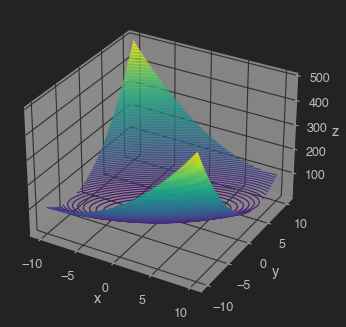

In [2]:
# 3D plot to visualize
def func(x1, x2):
    return x1**2 - 2*x1*x2 + 2*x2**2

x1 = np.linspace(-10, 10, 30)
x2 = np.linspace(-10, 10, 30)

X, Y = np.meshgrid(x1, x2)
Z = func(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

### 3.2
Consider $ \mathbb{R}^2$ with $\langle *,*\rangle $ defined for all $\vec{x}, \vec{y}$ in $\mathbb{R}^2$ as

$\langle \vec{x}, \vec{y} \rangle : = x^T \begin{bmatrix}
2&0 \\
1&2 \end{bmatrix} y $

$ A = \begin{bmatrix}
2&0 \\
1&2 \end{bmatrix} $

is $\langle *,*\rangle $ an inner product?

In [3]:
# no, the matrix A is not symmetric
A = np.array([[2, 0], [1, 2]]).reshape(2, 2)
A

array([[2, 0],
       [1, 2]])

In [4]:
A.T

array([[2, 1],
       [0, 2]])

### 3.3
Compute the distance between $$ \vec{x} = \begin{bmatrix}
1 \\
2 \\
3 \end{bmatrix}, \vec{y} = \begin{bmatrix}
-1 \\
-1 \\
0 \end{bmatrix}  $$

using


a. $\langle \vec{x}, \vec{y} \rangle := x^Ty $

$ x - y = \begin{bmatrix}
1 - 2 \\
2 - 1 \\
3 - 0 \end{bmatrix}  = \begin{bmatrix}
-1 \\
1 \\
3 \end{bmatrix}$

$ d(\vec{x}, \vec{y}) := \sqrt{\langle x-y, x-y \rangle}  = \sqrt{\langle x-y, x-y \rangle}$


In [5]:
x = np.array([1, 2, 3]).reshape(3, 1)
y = np.array([-1, -1, 0]).reshape(3, 1)
x_y = x - y
inner_product = np.matmul(x_y.T, x_y)
dist = np.sqrt(inner_product)
print('inner product', inner_product)
print('distance', dist)

inner product [[22]]
distance [[4.69041576]]


b. $\langle \vec{x}, \vec{y} \rangle := x^TAy, A = \begin{bmatrix}
2&1&0 \\
1&3&-1 \\
0&-1&2 \end{bmatrix} $

In [6]:
A = np.array([[2, 1, 0], [1, 3, -1], [0, -1, 2]]).reshape(3, 3)

inner_product = np.matmul(x_y.T, np.matmul(A, x_y))
dist = np.sqrt(inner_product)
print('inner product',  inner_product)
print('distance',  dist)

inner product [[47]]
distance [[6.8556546]]


<ipython-input-7-8ae8296e8950>:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


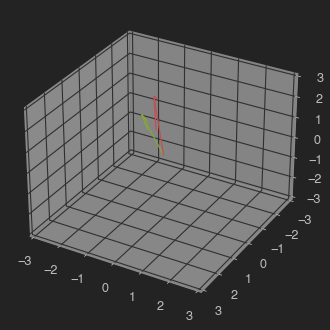

In [7]:
# plotting 
fig = plt.figure()
ax = fig.gca(projection = '3d')
scale3D = 3
ax.set_xlim3d(-scale3D,scale3D)
ax.set_ylim3d(scale3D,-scale3D)
ax.set_zlim3d(-scale3D,scale3D)
origin  = np.array([0, 0, 0])
ax.grid(True)
# Figure setup.

colors = ["r","g"]
ax.quiver(*origin,*x, length=2,color='r')
ax.quiver(*origin,*y, length=2,color='g')

### 3.4 
Compute the angle between $$ \vec{x} = \begin{bmatrix}
1 \\
2 \end{bmatrix}, \vec{y} = \begin{bmatrix}
-1 \\
-1 \end{bmatrix}  $$

using


a. $\langle \vec{x}, \vec{y} \rangle := x^Ty $


$$
cos\omega = \frac{\langle x,y\rangle}{||x||* ||y||} = \frac{\langle x,y\rangle}{\sqrt{\langle x,x\rangle\langle y,y\rangle}} = \frac{x^Ty}{\sqrt{x^Txy^Ty}}
$$

The angle between the vectors is 2.82 radians or 161.57 degrees


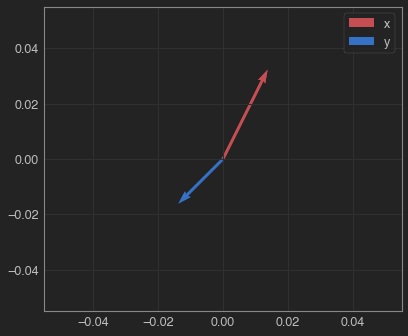

In [8]:
x = np.array([1, 2]).reshape(2, 1)
y = np.array([-1, -1]).reshape(2, 1)

def get_angle(x, y):
    """
    takes in two vectors of the same length and returns a tuple of the angle between them in radians and degrees.
    """
    inner_product = np.dot(x.T, y)
    vector_norms = np.sqrt(np.dot(x.T, x)*np.dot(y.T, y))
    cos_angle = inner_product / vector_norms
    radians = math.acos(cos_angle)
    degrees = radians * (180 / math.pi)
    print('The angle between the vectors is {:.2f} radians or {:.2f} degrees'.format(radians, degrees))
    return (radians, degrees)

get_angle(x, y)

#plot vectors
origin = ([[0, 0], [0, 0]])
plt.quiver(*origin, *x, color=['r'], scale=8, label='x')
plt.quiver(*origin, *y, color='b', scale=8, label='y')
plt.legend()
plt.show()

using


b. $\langle \vec{x}, \vec{y} \rangle := x^TBy, B := \begin{bmatrix}
2&1 \\
1&3 \end{bmatrix} $

In [9]:
# update our function so that it includes a transformation matrix
def get_angle(x, y, B = np.array([[1, 0], [0, 1]]).reshape(2, 2)):
    """
    takes in two vectors of the same length and a transformation matrix and returns a tuple of the angle between them in radians and degrees.
    Transformation matrix B is the stardanrd coordinate system by default. 
    """
    inner_product = np.dot(x.T, np.dot(B, y))
    vector_norms = np.sqrt(np.dot(x.T, np.dot(B, x))*np.dot(y.T, np.dot(B, y)))
    cos_angle = inner_product / vector_norms
    radians = math.acos(cos_angle)
    degrees = radians * (180 / math.pi)
    print('The angle between the vectors is {:.2f} radians or {:.2f} degrees'.format(radians, degrees))
    return (radians, degrees)

B = np.array([[2, 1], [1, 3]]).reshape(2, 2)
get_angle(x, y, B)

The angle between the vectors is 2.94 radians or 168.51 degrees


(2.9410462957012875, 168.5095400962685)

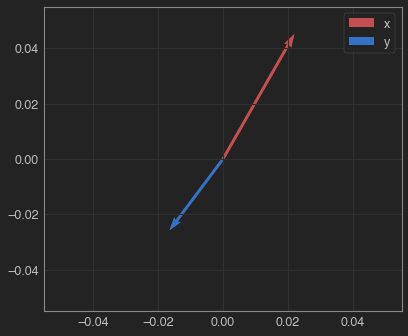

In [10]:
#plot vectors
new_x = np.dot(B, x)
new_y = np.dot(B, y)

origin = ([[0, 0], [0, 0]])
plt.quiver(*origin, *new_x, color=['r'], scale=20, label='x')
plt.quiver(*origin, *new_y, color='b', scale=20, label='y')
plt.legend()
plt.show()

### 3.5

Consider the Euclidean vector space $ \mathbb{R}^5$ with the dot product. A subspace $ U \subseteq \mathbb{R}^5$ and x $\in \mathbb{R}^5 $ are given by
$$ U = span [ \begin{bmatrix}
0 \\
-1 \\
2 \\
0 \\
2 \end{bmatrix},  \begin{bmatrix}
1 \\
-3 \\
1 \\
-1 \\
2 \end{bmatrix}, \begin{bmatrix}
-3 \\
4 \\
1 \\
2 \\
1 \end{bmatrix}, \begin{bmatrix}
-1 \\
-3 \\
5 \\
0 \\
7 \end{bmatrix}], \mathbf{x} = \begin{bmatrix}
-1 \\
-9 \\
-1 \\
4 \\
1 \end{bmatrix}$$

a. Determine the orthogonal projection $ \pi_U(x) $ of $ \mathbf{x} $ onto $ U $.  




In [11]:
u1 = np.array([0, -1, 2, 0, 2]).reshape(5, 1)
u2 = np.array([1, -3, 1, -1, 2]).reshape(5, 1)
u3 = np.array([-3, 4, 1, 2, 1]).reshape(5, 1)
u4 = np.array([-1, -3, 5, 0, 7]).reshape(5, 1)
x = np.array([-1, -9, -1, 4, 1]).reshape(5, 1)

U = np.hstack([u1, u2, u3, u4])
U.shape

(5, 4)

In [12]:
# determine matrix rank
rank = np.linalg.matrix_rank(U)
print('rank of U: ', rank)
# decompose matrix via qr decomposition (U = QR) Q is an orthogonal matrix and R is an upper triangular matrix
Q, R = np.linalg.qr(U)
# get basis set of U 
B = Q[:, :rank]

rank of U:  3


$ \pi_U(x) = B\lambda $ 

$ \lambda = (B^TB)^{-1}B^T\mathbf{x}$



In [13]:
# Computing the projection 
inner_prod = np.dot(B.T, B)
coefficients = np.dot(np.dot(np.linalg.inv(inner_prod), B.T), x) 
projection = np.dot(B, coefficients)
print(projection)

[[ 1.]
 [-5.]
 [-1.]
 [-2.]
 [ 3.]]


In [14]:
# An important trick to note is that if the basis is orthonormal, 𝜆=𝐵𝑇𝑥 and the projection 𝜋𝑈(𝑥)=𝐵𝐵𝑇𝑥 since BTB = I.
# check if basis is orthonormal 
print(np.round(inner_prod)) # the identity matrix
projection = np.dot(B, np.dot(B.T, x))
projection

[[ 1.  0. -0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]]


array([[ 1.],
       [-5.],
       [-1.],
       [-2.],
       [ 3.]])

$ \pi_U(x) = \begin{bmatrix}
1 \\
-5 \\
-1 \\
-2 \\
3 \end{bmatrix}$ 

b. Determine the distance $d(\mathbf{x}, U) $

The distance between $ \vec{x} $ and subspace $U$ can be given by the norm of the displacement vector $ ||\pi_U(x)_{\bot}||$

$ \pi_U(x)_{\bot} = x - \pi_U(x) = \begin{bmatrix}
-1 \\
-9 \\
-1 \\
4 \\
1 \end{bmatrix} - \begin{bmatrix}
1 \\
-5 \\
-1 \\
-2 \\
3 \end{bmatrix} $

$ ||\pi_U(x)_{\bot}|| = \sqrt{ \langle \pi_U(x)_{\bot}, \pi_U(x)_{\bot} \rangle }$

In [15]:
displacement_vector = x - projection
distance = np.sqrt(np.dot(displacement_vector.T, displacement_vector))
print(np.round(distance[0][0], 2), 'units')

7.75 units


### 3.6
Consider $ \mathbb{R}^3$ with the inner product $$ \langle \mathbf{x}, \mathbf{y} \rangle := \mathbf{x}^T \begin{bmatrix}
2&1&0 \\
1&2&-1 \\
0&-1&2 \end{bmatrix}\mathbf{y}$$

$ e_1, e_2, e_3 $ are the standard basis in $ \mathbb{R}^3$

a. Determine the orthogonal projection $ \pi_U(e_2) $ of $ e_2 $ onto 

$$ U = span[e_1, e_3] $$

$ U = \begin{bmatrix}
1&0 \\
0&0 \\
0&1 \end{bmatrix} $

In [16]:
# create inner product function
A = np.array([[2, 1, 0], [1, 2, -1], [0, -1, 2]])
def inner_prod(x, y):
    return np.dot(x.T, np.dot(A, y))

# standard coordinate vectors in R3
e1 = np.array([1, 0, 0]).reshape(3, 1)
e2 = np.array([0, 1, 0]).reshape(3, 1)
e3 = np.array([0, 0, 1]).reshape(3, 1)

U = np.array([e1, e3]).reshape(3, 2)

In [17]:
# check orthogonality
print('inner product for:')
print('e1, e2: ', inner_prod(e1, e2)) # not orthogonal
print('e1, e3: ', inner_prod(e1, e3)) # orthogonal 
print('e2, e3: ', inner_prod(e2, e3)) # not orthogonal 

inner product for:
e1, e2:  [[1]]
e1, e3:  [[0]]
e2, e3:  [[-1]]


In [18]:
# since e1, e3 are orthogonal, we can determine the projection by taking the inner product of e2 with the basis vectors
proj_e1 = inner_prod(e2, e1) / inner_prod(e1, e1) * e1
proj_e3 = inner_prod(e2, e3) / inner_prod(e3, e3) * e3
projection = np.array([proj_e1 + proj_e3]).reshape(3, 1)
projection

array([[ 0.5],
       [ 0. ],
       [-0.5]])

b. Compute the distance $d(e_2, U) $

In [19]:
displacement_vector = e2 - projection
distance = np.sqrt(inner_prod(displacement_vector, displacement_vector))
print('e2 is {:.2f} units from U'.format(distance[0][0]))

e2 is 1.00 units from U


c. Draw the scenario: standard bais vectors and $\pi_U(e_2)$

<ipython-input-20-1e80a9d0972e>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


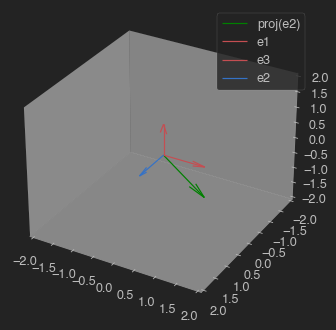

In [20]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
scale3D = 2
ax.set_xlim3d(-scale3D,scale3D)
ax.set_ylim3d(scale3D,-scale3D)
ax.set_zlim3d(-scale3D,scale3D)
origin  = np.array([0, 0, 0])
ax.grid(False)
# Figure setup.
ax.quiver(*origin, *projection, length=2, color='green', label='proj(e2)')
ax.quiver(*origin,*e1, length=1,color='r', label='e1')
ax.quiver(*origin,*e3, length=1,color='r', label='e3')
ax.quiver(*origin,*e2, length=1,color='b', label='e2')

plt.legend()
plt.show()


### 3.7

### 3.8

### 3.9

### 3.10